# **UBER FARE PRICE PREDICTION**

# **Importing the Basic Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Loading the Dataset**
First we load the dataset and find out the number of columns, rows, NULL values, etc.

1. Data is from 2009 to 2015
2. 200,000 Entries

In [3]:
uber = pd.read_csv('./uber.csv')

uber.head()

Unnamed: 0      key  fare_amount          pickup_datetime  \
0    24238194  52:06.0          7.5  2015-05-07 19:52:06 UTC   
1    27835199  04:56.0          7.7  2009-07-17 20:04:56 UTC   
2    44984355  45:00.0         12.9  2009-08-24 21:45:00 UTC   
3    25894730  22:21.0          5.3  2009-06-26 08:22:21 UTC   
4    17610152  47:00.0         16.0  2014-08-28 17:47:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  
0                1  
1                1  
2                1  
3                3  
4                5

In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# **Dropping the NULL values**
We will check for NULL values in Dataset

In [5]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Dropping first and second column, because key and ID are not useful in predictions and also dropping rows containing null values

In [6]:
uber_2 = uber.drop(['Unnamed: 0','key'],axis=1)
# axis = 1 is for columns and 0 is for rows

# dropping the null values that we have checked above
uber_2.dropna(axis=0,inplace=True)

In [7]:
uber_2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# **Haversine Formula**
Calculating the distance btw the pickup and drop co-ordinates using the Haversine formual for accuracy.

In [8]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

Defining the ride distance dataframe.

In [9]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],
                             uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance'] = uber_2['Distance'].astype(float).round(2)    # Round-off Optional

In [10]:
uber_2.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  Distance  
0         -73.999512         40.723217                1      1.68  
1         -73.994710         40.750325                1      2.46  
2         -73.962565         40.772647                1      5.04  
3         -73.965316         40.803349                3      1.66  
4         -73.973082         40.761247                5      4.48

# **Scatter Plot**
Distance vs Fare Amount

Text(0, 0.5, 'fare_amount')

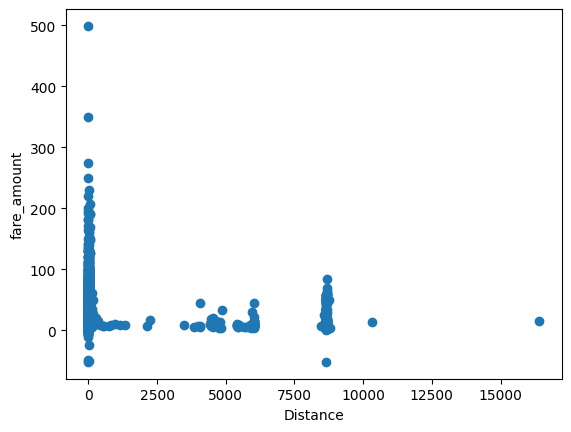

In [11]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

# **Outliers** 
We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

<Axes: >

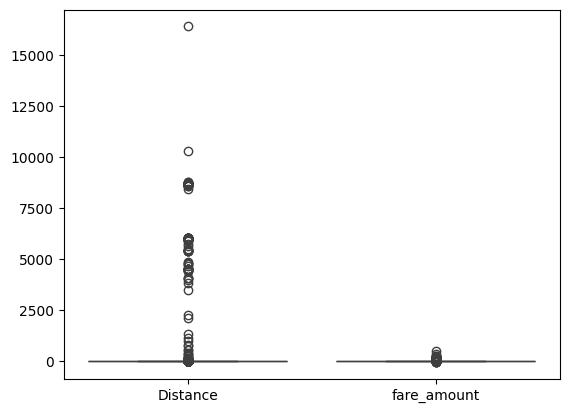

In [12]:
import seaborn as sns
sns.boxplot(data= uber_2[['Distance', 'fare_amount']])

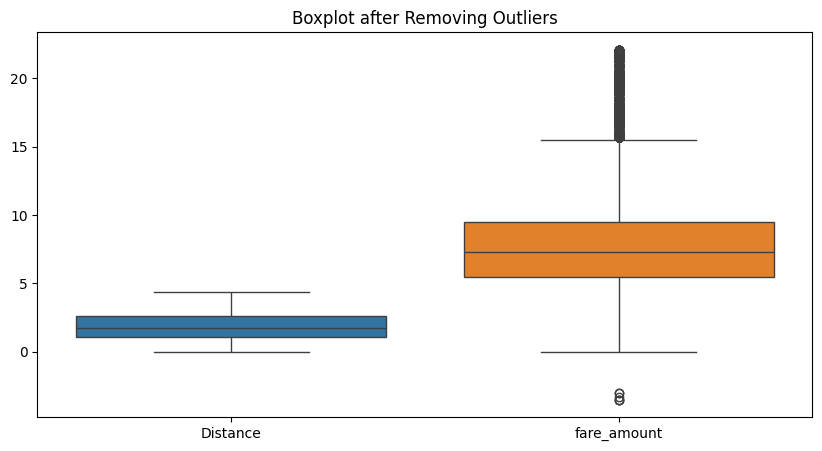

In [13]:
Q1 = uber_2['fare_amount'].quantile(0.25)  
Q3 = uber_2['fare_amount'].quantile(0.75)  
IQR = Q3 - Q1                    
lower_bound = Q1 - 1.5 * IQR      
upper_bound = Q3 + 1.5 * IQR 

uber_2 = uber_2[(uber_2['fare_amount'] >= lower_bound) & (uber_2['fare_amount'] <= upper_bound)]


Q1 = uber_2['Distance'].quantile(0.35)  
Q3 = uber_2['Distance'].quantile(0.65)  
IQR = Q3 - Q1                    
lower_bound = Q1 - 1.5 * IQR      
upper_bound = Q3 + 1.5 * IQR 

uber_2 = uber_2[(uber_2['Distance'] >= lower_bound) & (uber_2['Distance'] <= upper_bound)]


plt.figure(figsize=(10, 5))
sns.boxplot(data=uber_2[['Distance', 'fare_amount']])
plt.title("Boxplot after Removing Outliers")
plt.show()


In [14]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156601 entries, 0 to 199998
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        156601 non-null  float64
 1   pickup_datetime    156601 non-null  object 
 2   pickup_longitude   156601 non-null  float64
 3   pickup_latitude    156601 non-null  float64
 4   dropoff_longitude  156601 non-null  float64
 5   dropoff_latitude   156601 non-null  float64
 6   passenger_count    156601 non-null  int64  
 7   Distance           156601 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.8+ MB


Text(0, 0.5, 'fare_amount')

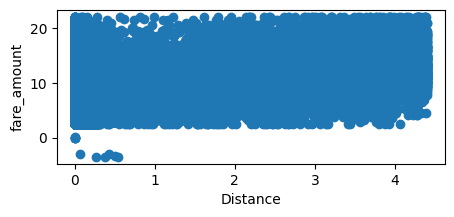

In [15]:
plt.figure(figsize=(5,2))
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [16]:
uber_2.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
5          4.9  2011-02-12 02:27:09 UTC        -73.969019        40.755910   
7          2.5  2012-12-11 13:52:00 UTC          0.000000         0.000000   

   dropoff_longitude  dropoff_latitude  passenger_count  Distance  
0         -73.999512         40.723217                1      1.68  
1         -73.994710         40.750325                1      2.46  
3         -73.965316         40.803349                3      1.66  
5         -73.969019         40.755910                1      0.00  
7           0.000000          0.000000                1      0.00

Now the scatter plot is looking more suitable.

# **Date and Time**
Separating the date and time into separate columns for more usability.

In [17]:
uber_2['pickup_datetime'] = pd.to_datetime(uber_2['pickup_datetime'])

uber_2['Year'] = uber_2['pickup_datetime'].apply(lambda time: time.year)
uber_2['Month'] = uber_2['pickup_datetime'].apply(lambda time: time.month)
uber_2['Day'] = uber_2['pickup_datetime'].apply(lambda time: time.day)
uber_2['Day of Week'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Day of Week_num'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Hour'] = uber_2['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_2['Day of Week'] = uber_2['Day of Week'].map(day_map)

uber_2['counter'] = 1

# **Pickup and Dropoff Columns**
Creating separate coumns for pickup and droppoff coordinates for more usability.

In [18]:
uber_2['pickup'] = uber_2['pickup_latitude'].astype(str) + "," + uber_2['pickup_longitude'].astype(str)   
uber_2['drop off'] = uber_2['dropoff_latitude'].astype(str) + "," + uber_2['dropoff_longitude'].astype(str)

In [19]:
uber_2.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
5          4.9 2011-02-12 02:27:09+00:00        -73.969019        40.755910   
7          2.5 2012-12-11 13:52:00+00:00          0.000000         0.000000   

   dropoff_longitude  dropoff_latitude  passenger_count  Distance  Year  \
0         -73.999512         40.723217                1      1.68  2015   
1         -73.994710         40.750325                1      2.46  2009   
3         -73.965316         40.803349                3      1.66  2009   
5         -73.969019         40.755910                1      0.00  2011   
7           0.000000          0.000000                1      0.00  2012   

   Month  Day Day of Week  Day of Week_num  Hour  counter  \
0      5    7         Thu                3    19        1   
1      7   17         Fri                4    20        1   
3      6   26         Fri                4     8        1   
5      2   12         Sat                5     2        1   
7     12   11         Tue                1    13        1   

                     pickup                  drop off  
0  40.73835373,-73.99981689  40.72321701,-73.99951172  
1      40.728225,-73.994355       40.750325,-73.99471  
3      40.790844,-73.976124      40.803349,-73.965316  
5       40.75591,-73.969019       40.75591,-73.969019  
7                   0.0,0.0                   0.0,0.0

Thus, we have increased the usability of the dataset.

# **Data Visualizations**
Finding the trends in the data variables

# **Average Yearly Trips**


Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [np.int64(24436), np.int64(23907), np.int64(25175), np.int64(25125), np.int64(24171), np.int64(23077), np.int64(10710)]


<BarContainer object of 7 artists>

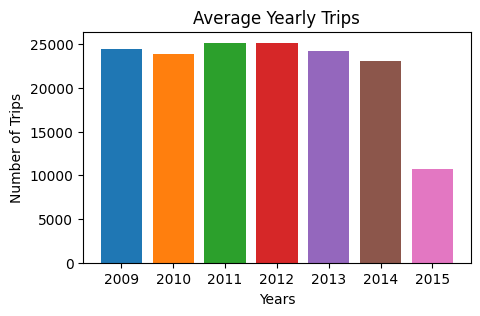

In [20]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(2009, 2016):
    x = uber_2.loc[uber_2['Year'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)

plt.figure(figsize=(5,3))
plt.title("Average Yearly Trips")
plt.xlabel("Years")
plt.ylabel("Number of Trips")

plt.bar(year, no_of_trips, color=colors)

# **Average Monthly Trips**

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [np.int64(14142), np.int64(13240), np.int64(14779), np.int64(14596), np.int64(14603), np.int64(13832), np.int64(11708), np.int64(11057), np.int64(11791), np.int64(12664), np.int64(11975), np.int64(12214)]


<BarContainer object of 12 artists>

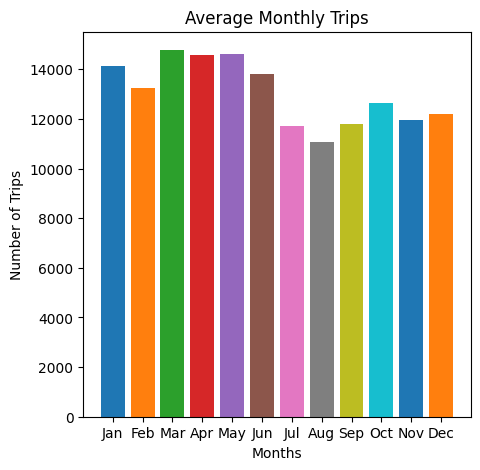

In [21]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(1, 13):
    x = uber_2.loc[uber_2['Month'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)

plt.figure(figsize=(5,5))
plt.title("Average Monthly Trips")
plt.xlabel("Months")
plt.ylabel("Number of Trips")

plt.bar(month, no_of_trips, color=colors)

# **Average Daily Trips**

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [np.int64(19780), np.int64(22429), np.int64(23033), np.int64(23627), np.int64(24384), np.int64(23572), np.int64(19776)]


<BarContainer object of 7 artists>

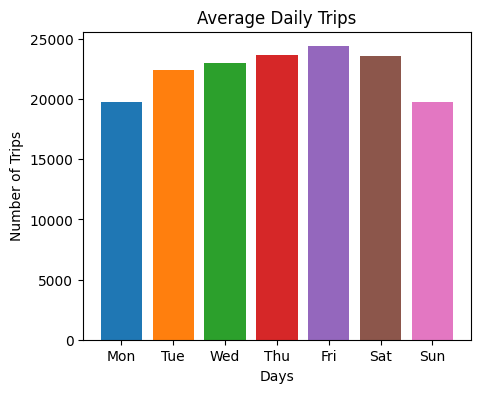

In [22]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(0, 7):
    x = uber_2.loc[uber_2['Day of Week_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.figure(figsize=(5,4))
plt.title("Average Daily Trips")
plt.xlabel("Days")
plt.ylabel("Number of Trips")

plt.bar(day, no_of_trips, color=colors)

# **Heat-Map**
A heat map to illustrate at what time of day and week, people are using Uber the most.

In [23]:
import seaborn as sns

df_1 = uber_2[['Distance', 'Day of Week_num', 'Hour']].copy()

df_h = df_1.copy()

df_h = df_h.groupby(['Hour', 'Day of Week_num']).mean()
df_h = df_h.unstack(level=0)

Text(0.5, 1.0, 'WEEKLY UBER RIDES')

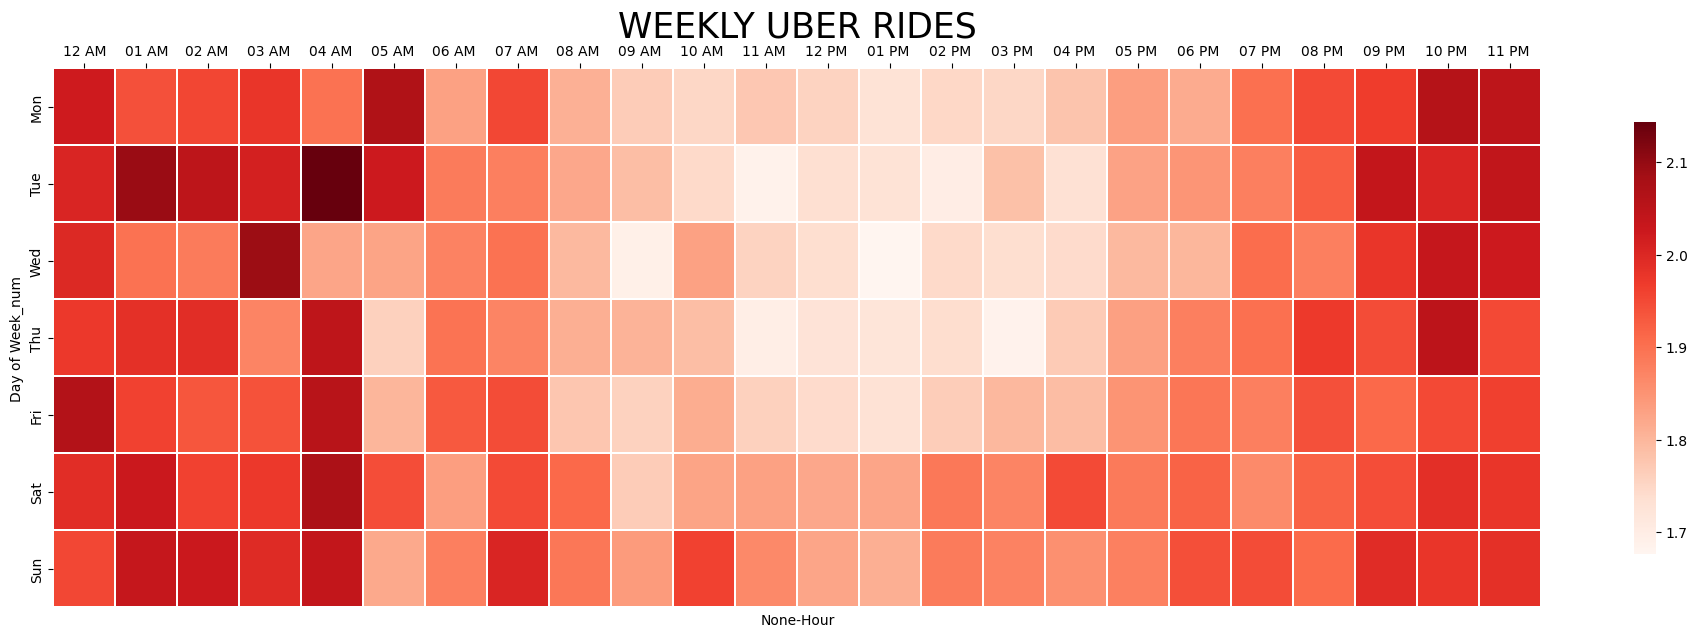

In [24]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_h, cmap="Reds",
           linewidth=0.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ', 
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) + .5, labels=xticks_labels)
plt.yticks(np.arange(7) + .5, labels=yticks_labels)

ax.xaxis.tick_top()


plt.title('WEEKLY UBER RIDES', fontdict={'fontsize': 25})



C:\Users\Jagrit Goyal\AppData\Local\Temp\ipykernel_25816\3568538936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


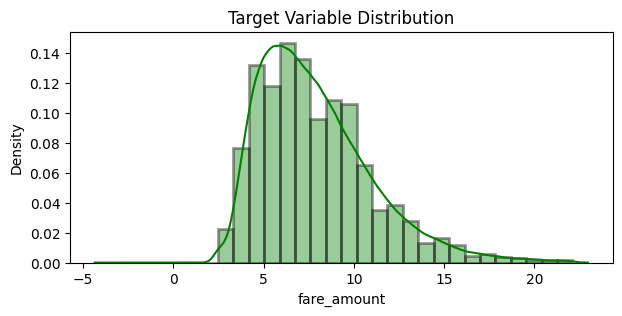

In [25]:
plt.figure(figsize=(7,3))
sns.distplot(uber_2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

# **Statistics**
Some general statistical information about the data

**Fare Amount**

In [26]:
import statistics as st

print("Mean of fare prices is % s "
         % (st.mean(uber_2['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(uber_2['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(uber_2['fare_amount'])))

Mean of fare prices is 7.864418234877172 
Median of fare prices is 7.3 
Standard Deviation of Fare Prices is 3.1365479613444625 


**Distance**

In [27]:
import statistics as st

print("Mean of Distance is % s "
         % (st.mean(uber_2['Distance'])))

print("Median of Distance is % s "
         % (st.median(uber_2['Distance'])))

print("Standard Deviation of Distance is % s "
                % (st.stdev(uber_2['Distance'])))

Mean of Distance is 1.86819228485131 
Median of Distance is 1.71 
Standard Deviation of Distance is 1.0600926299737394 


# **Coorelation Matrix**
To find the two variables that have the most inter-dependence

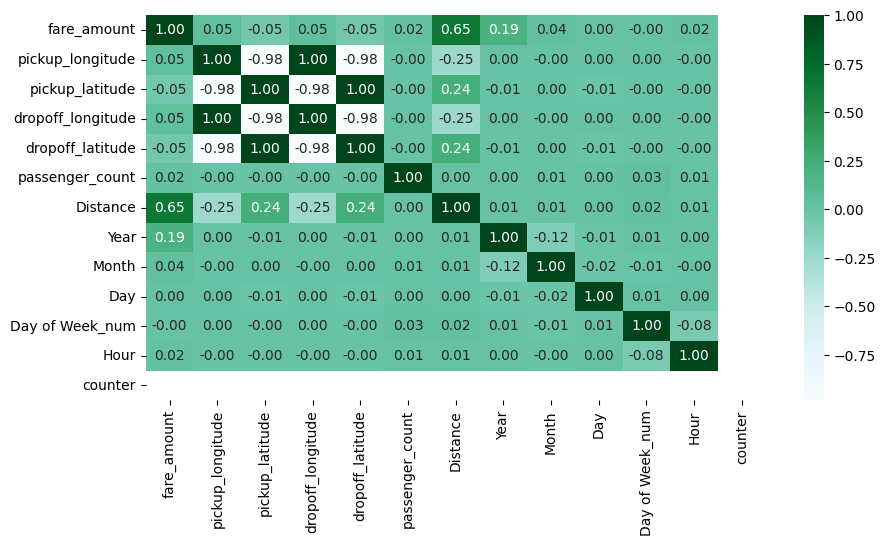

In [49]:
corr = uber_2.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f")
plt.show()

# **Standardization**
For more accurate results on our linear regression model

**Assigning the dependent and independent variable**

In [29]:
X = uber_2['Distance'].values.reshape(-1, 1)        #Independent Variable
y = uber_2['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [30]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.11618486]
 [-0.05242029]
 [-0.81759516]
 ...
 [-1.55088774]
 [-0.11618486]
 [ 2.11557516]]
[[-0.17752494]
 [ 0.55826216]
 [-0.19639128]
 ...
 [-1.65853233]
 [ 0.01113842]
 [ 1.57704431]]


# **Splitting the Dataset**
Training and Test Set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

# **Simple Linear Regression**


In [32]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.42
Test set score: 0.4231121


**Actual vs Predicted Values**

In [33]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}

from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+------------+--------------+
|     Actual |    Predicted |
|------------+--------------|
|  2.11558   |  0.5691      |
|  0.0751089 |  0.067483    |
|  0.362049  | -0.244498    |
| -0.307479  | -0.183326    |
| -0.945124  | -0.018159    |
| -0.435008  |  0.244884    |
|  0.0751089 | -0.342375    |
| -0.690066  | -0.434134    |
| -0.817595  | -0.158856    |
| -0.690066  | -0.574832    |
|  0.521461  |  0.177594    |
| -0.690066  | -1.14374     |
| -0.179949  | -0.324023    |
| -0.913242  | -0.397431    |
| -1.58277   | -1.08257     |
|  1.09534   |  1.27259     |
| -0.435008  |  0.159242    |
| -0.435008  | -0.629887    |
|  0.967813  |  1.15024     |
| -0.179949  |  0.581335    |
| -0.594419  | -0.48919     |
| -0.307479  | -0.440251    |
| -1.20018   |  1.24812     |
|  0.202638  |  0.599687    |
|  0.680872  |  1.25424     |
|  0.999695  | -0.293437    |
|  0.362049  |  0.336643    |
| -0.562537  | -0.391313    |
| -0.116185  | -0.177208    |
|  1.31852   |  1.01566     |
|  0.20263

# **Accuracy Checking**
Finding the MSE,MAE, RMSE, etc.

In [34]:
from sklearn import metrics
mae_slr = metrics.mean_absolute_error(y_test, y_pred)
mse_slr = metrics.mean_squared_error(y_test, y_pred)
rmse_slr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.5379708688483178
Mean Squared Error: 0.5824832950208932
Root Mean Squared Error: 0.7632059322495425


# **Plotting the Graph**

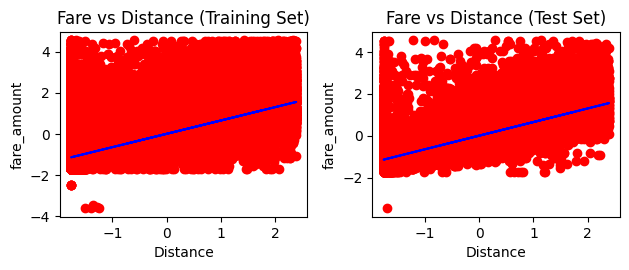

In [35]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (6,8)
plt.show()

# **Random Forest**

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rf_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(rf_reg.score(X_test, y_test)))

C:\Users\Jagrit Goyal\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training set score: 0.49
Test set score: 0.4867455


Actual vs Predicted values

In [37]:
from tabulate import tabulate
y_pred = rf_reg.predict(X_test)

df = {'Actual': y_test, 'Predicted': y_pred}
print(tabulate(df, headers='keys', tablefmt='psql'))

+------------+-------------+
|     Actual |   Predicted |
|------------+-------------|
|  2.11558   |  0.623996   |
|  0.0751089 |  0.0911705  |
|  0.362049  | -0.341431   |
| -0.307479  | -0.269129   |
| -0.945124  | -0.0821648  |
| -0.435008  |  0.297074   |
|  0.0751089 | -0.458414   |
| -0.690066  | -0.562106   |
| -0.817595  | -0.157787   |
| -0.690066  | -0.75123    |
|  0.521461  |  0.155658   |
| -0.690066  |  0.0955145  |
| -0.179949  | -0.447315   |
| -0.913242  | -0.547095   |
| -1.58277   | -0.482277   |
|  1.09534   |  1.39745    |
| -0.435008  |  0.13647    |
| -0.435008  | -0.865764   |
|  0.967813  |  1.31374    |
| -0.179949  |  0.669156   |
| -0.594419  | -0.637018   |
| -0.307479  | -0.617016   |
| -1.20018   |  1.27727    |
|  0.202638  |  0.603178   |
|  0.680872  |  1.36702    |
|  0.999695  | -0.39315    |
|  0.362049  |  0.401102   |
| -0.562537  | -0.493401   |
| -0.116185  | -0.243402   |
|  1.31852   |  1.05655    |
|  0.202638  |  0.0370795  |
|  1.15911   |

# **Accuracy Checking**
Finding the MSE,MAE, RMSE, etc.

In [38]:
from sklearn import metrics
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
mse_rf = metrics.mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.5071907904907703
Mean Squared Error: 0.5182327113586187
Root Mean Squared Error: 0.7198838179585777


# **Plotting the Graph**

Important note -> Random Forest is a non-linear model and uses multiple decision trees. When we plot predictions from Random Forest, we see multiple lines because each tree makes a separate prediction, and the final prediction is the average of all trees

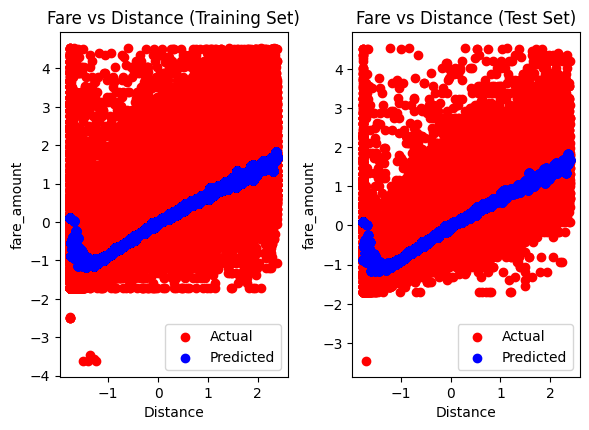

In [39]:
train_predictions = rf_reg.predict(X_train)
test_predictions = rf_reg.predict(X_test)

plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color='red', label='Actual')
plt.scatter(X_train, train_predictions, color='blue', label='Predicted')
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, test_predictions, color='blue', label='Predicted')
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")
plt.legend()

plt.tight_layout()
plt.rcParams["figure.figsize"] = (6, 8)
plt.show()


# **Gradient Boosting**

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_reg.fit(X_train, y_train)
print("Training set score: {:.2f}".format(gb_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(gb_reg.score(X_test, y_test)))

C:\Users\Jagrit Goyal\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Training set score: 0.49
Test set score: 0.4891795


Actual vs Predicted values

In [41]:
from tabulate import tabulate
y_pred = gb_reg.predict(X_test)

df = {'Actual': y_test, 'Predicted': y_pred}
print(tabulate(df, headers='keys', tablefmt='psql'))

+------------+-------------+
|     Actual |   Predicted |
|------------+-------------|
|  2.11558   |  0.618733   |
|  0.0751089 |  0.0758643  |
|  0.362049  | -0.335853   |
| -0.307479  | -0.263352   |
| -0.945124  | -0.0502393  |
| -0.435008  |  0.27302    |
|  0.0751089 | -0.464988   |
| -0.690066  | -0.560983   |
| -0.817595  | -0.190055   |
| -0.690066  | -0.741789   |
|  0.521461  |  0.167829   |
| -0.690066  |  0.0930269  |
| -0.179949  | -0.449512   |
| -0.913242  | -0.529257   |
| -1.58277   | -0.579371   |
|  1.09534   |  1.33227    |
| -0.435008  |  0.167829   |
| -0.435008  | -0.861128   |
|  0.967813  |  1.21929    |
| -0.179949  |  0.631516   |
| -0.594419  | -0.645416   |
| -0.307479  | -0.594712   |
| -1.20018   |  1.33227    |
|  0.202638  |  0.631516   |
|  0.680872  |  1.33227    |
|  0.999695  | -0.410515   |
|  0.362049  |  0.366368   |
| -0.562537  | -0.492316   |
| -0.116185  | -0.26189    |
|  1.31852   |  1.05158    |
|  0.202638  |  0.0442216  |
|  1.15911   |

# **Accuracy Checking**
Finding the MSE,MAE, RMSE, etc.

In [45]:
from sklearn import metrics
mae_gb= metrics.mean_absolute_error(y_test, y_pred)
mse_gb = metrics.mean_squared_error(y_test, y_pred)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5063107678615346
Mean Squared Error: 0.5157750594843075
Root Mean Squared Error: 0.7181748112293465


# **Plotting the Graph**

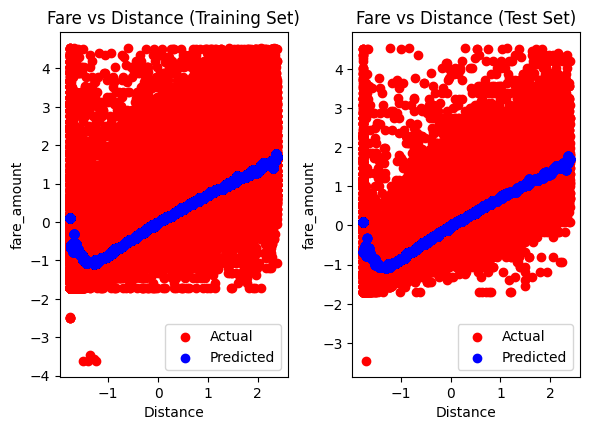

In [46]:
train_predictions = gb_reg.predict(X_train)
test_predictions = gb_reg.predict(X_test)

plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color='red', label='Actual')
plt.scatter(X_train, train_predictions, color='blue', label='Predicted')
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, test_predictions, color='blue', label='Predicted')
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")
plt.legend()

plt.tight_layout()
plt.rcParams["figure.figsize"] = (6, 8)
plt.show()


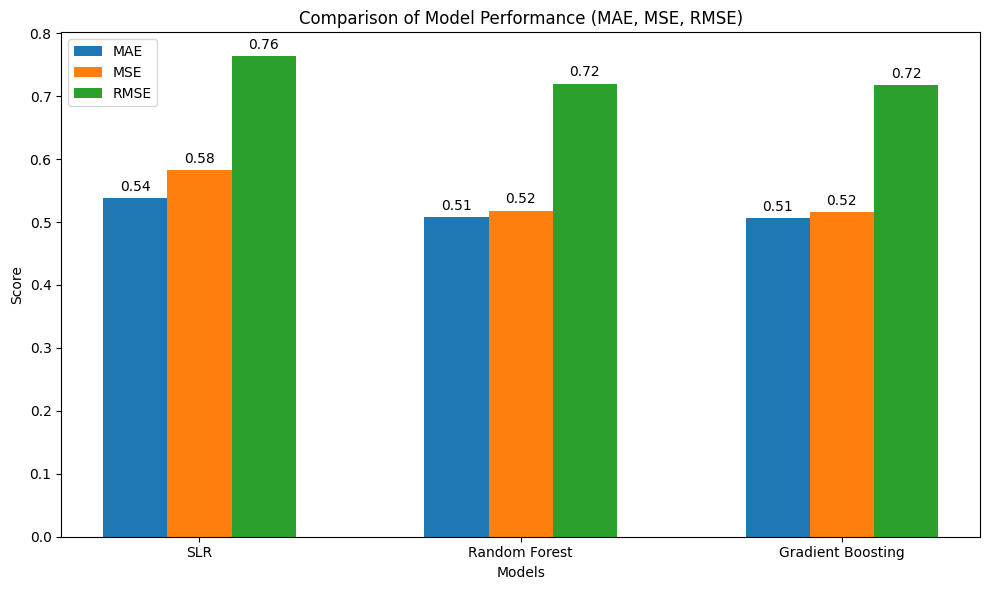

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
models = ['SLR', 'Random Forest', 'Gradient Boosting']
mae = [mae_slr, mae_rf, mae_gb]  # Replace with your MAE values for each model
mse = [mse_slr, mse_rf, mse_gb]  # Replace with your MSE values for each model
rmse = [rmse_slr, rmse_rf, rmse_gb]  # Replace with your RMSE values for each model

# Define the bar positions
x = np.arange(len(models))

# Set the width of the bars
width = 0.2

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mae, width, label='MAE')
rects2 = ax.bar(x, mse, width, label='MSE')
rects3 = ax.bar(x + width, rmse, width, label='RMSE')

# Add text labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance (MAE, MSE, RMSE)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()
